In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import itertools

# plt.style.use('fivethirtyeight')
# %matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 13, 8

import plotly.express as px

# import collections

import functions as fun



import datetime
import seaborn as sns
sns.set()


In [2]:
%load_ext autoreload
%autoreload

In [3]:
z_df = pd.read_csv('zillow_data.csv')
z_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Data of all regions/cities and states with values of homes for each month from 1996 to 2018

# Let's look at Chicago because:
- urbanization and public transportation
- possiblility of looking at homes closest to train lines?
- walkscore?
- population and growth?


In [7]:
df_chicago = z_df.loc[z_df['City']=='Chicago']
df_chicago.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [8]:
# Let's make a back up to be safe from overriding
df_chicago_copy = z_df.loc[z_df['City']=='Chicago']
# df_chicago_copy

In [9]:
##Rename RegionName to ZipCode
df_chicago.rename(columns={'RegionName': 'ZipCode'}, inplace=True)
df_chicago.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [10]:
# make sure all zip codes are Cook County 
df_chicago['CountyName'].nunique()

1

In [11]:
df_chicago['ZipCode'].nunique()

41

#### Decided to drop all null values because one of the zip codes didn't have data until 2013 and that was about it so I just got rid of it because it really wasn't a zip code I felt we could predict for.

In [12]:
df_chicago.isna().sum()

RegionID    0
ZipCode     0
City        0
State       0
Metro       0
           ..
2017-12     0
2018-01     0
2018-02     0
2018-03     0
2018-04     0
Length: 272, dtype: int64

In [13]:
df_chicago.dropna(inplace=True)

In [14]:
df_chicago['ZipCode'].nunique()

40

#### Just to double check - we only lost one zip code there

### So to narrow down zip codes I decided to use Zillow's size rank score which is based on population - the lower the score = higher the population density
### For my business case I wanted to filter and use the more urbanized zip codes because:
- Walkability Scores
- Public Transportation
- Low Carbon Emissions
- Restaurants within 10 block radius (?)
- ?? more ??

#### I don't have a set top % I want to use - I'm basically just playing with the quantile range to see how many zip codes are returned that seem to be a fair amount to use for modeling/forecasting.

In [15]:
# filter zipcodes with a size rank in the top 75% (highly urbanized zipcodes)

urban = df_chicago.SizeRank.quantile(q=0.75)
print(f'Size Rank 75% cutoff value: {urban}')
top_zips_df = df_chicago[df_chicago['SizeRank'] < urban]
print(f'Amount of zip codes: {top_zips_df.ZipCode.nunique()}')
top_zips_df.head()


Size Rank 75% cutoff value: 2083.5
Amount of zip codes: 30


,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [16]:
top_zips_df.to_csv('top_zips_with_all_columns.csv', index=False)

In [17]:
# get locations
# best_zips = list(top_zips_df.ZipCode.values)
# for i in best_zips:
#     city = top_zips_df[top_zips_df['ZipCode']==i].City.values[0]
#     state = top_zips_df[top_zips_df['ZipCode']==i].State.values[0]
#     region = top_zips_df[top_zips_df['ZipCode']==i].RegionID.values[0]
#     print(f'ZipCode: {i}\n Location: {city}, {state}\n')
#     print(f'ZipCode: {i}\n Region ID: {region}\n')

In [20]:
# making a dictionary of zip codes with their corresponding region id's 
# because I may need them for plotting or identification of zip code location
# region
region_dict = {}
zip_list = top_zips_df.ZipCode.unique()
for i in zip_list:
    region = top_zips_df[top_zips_df['ZipCode']==i].RegionID.values[0]
    region_dict[i] = region

In [21]:
region_dict[60657]

84654

### I wanted to drop some unnecessary columns for plotting only - I am not ready to melt the dataframe or make this a time series yet

In [22]:
plotting_df = top_zips_df.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
plotting_df.head()

,ZipCode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,60640,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,60647,122700.0,122800.0,122800.0,122700.0,122400.0,122000.0,121500.0,120900.0,120500.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,60618,142600.0,143100.0,143400.0,143300.0,142900.0,142200.0,141300.0,140100.0,139000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [23]:
## Reset index 
plot_df = plotting_df.reset_index(drop=True)
plot_df.head()

,ZipCode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
2,60640,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
3,60647,122700.0,122800.0,122800.0,122700.0,122400.0,122000.0,121500.0,120900.0,120500.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
4,60618,142600.0,143100.0,143400.0,143300.0,142900.0,142200.0,141300.0,140100.0,139000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [24]:
## change zipcodes to string
plot_df["ZipCode"] = plot_df["ZipCode"].astype(str)

In [25]:
## change values to integer

# chicago_plot = chicago_plot.astype(int)

In [26]:
## transpose dates to rows
plot_df = plot_df.transpose()
plot_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
ZipCode,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60638,60639,60630,60643,60632,60605,60645,60651,60653,60654
1996-04,334200,498100,216500,122700,142600,297900,93400,148900,76400,435200,...,127400,111200,150600,86400,99600,293500,164900,74700,116900,510000
1996-05,335400,500900,216700,122800,143100,300400,94100,149300,77000,435200,...,128300,111900,151600,87200,100100,293000,165400,75100,115700,510200
1996-06,336500,503100,216900,122800,143400,302600,94600,149600,77400,435100,...,129000,112300,152300,87600,100400,292500,165700,75400,114500,510100
1996-07,337600,504600,217000,122700,143300,304700,94800,149700,77700,434600,...,129100,112500,152600,87800,100400,291700,165600,75600,113300,509600


In [27]:
## Renaming columns
new_header = plot_df.iloc[0] ## grab first row for new header
plot_df = plot_df[1:] ## take all data after first row
plot_df.columns = new_header ## reassign all columns to zipcodes

In [28]:
plot_df.head()

ZipCode,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60638,60639,60630,60643,60632,60605,60645,60651,60653,60654
1996-04,334200,498100,216500,122700,142600,297900,93400,148900,76400,435200,...,127400,111200,150600,86400,99600,293500,164900,74700,116900,510000
1996-05,335400,500900,216700,122800,143100,300400,94100,149300,77000,435200,...,128300,111900,151600,87200,100100,293000,165400,75100,115700,510200
1996-06,336500,503100,216900,122800,143400,302600,94600,149600,77400,435100,...,129000,112300,152300,87600,100400,292500,165700,75400,114500,510100
1996-07,337600,504600,217000,122700,143300,304700,94800,149700,77700,434600,...,129100,112500,152600,87800,100400,291700,165600,75600,113300,509600
1996-08,338500,505500,217100,122400,142900,306600,94700,149700,77700,433900,...,128900,112500,152400,87700,100300,290900,165400,75600,112300,508800


In [29]:
# plot_df.plot()
# plt.title('Home Value Span for Chicago Zip Codes with Top 75% Urbanization')
# plt.xlabel('time')
# plt.ylabel('median home value')
# plt.legend("")
# plt.show()

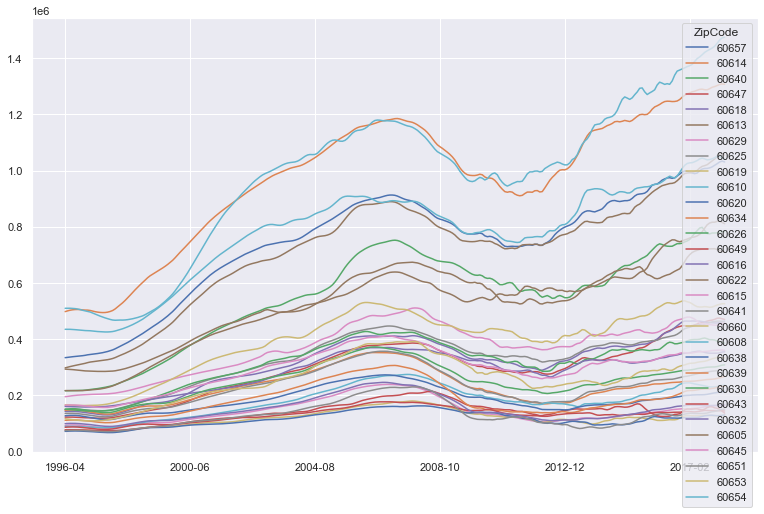

In [30]:
fun.plot(plot_df)
# plt.title('Home Value Span for Chicago Zip Codes with Top 75% Urbanization')

### Obviously the economic crash of 2008 had a huge unforeseen affect on housing values.
#### Because of this I decided to take only data from 2011 on where it looks to have started to straighten back out.


In [31]:
plot_df = plot_df.loc[plot_df.index >= '2011-01']

In [32]:
plot_df

ZipCode,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60638,60639,60630,60643,60632,60605,60645,60651,60653,60654
2011-01,729300,923000,600000,286500,317400,722000,125300,337500,122200,749200,...,172100,142700,228100,134600,133300,555800,289000,120100,276800,944900
2011-02,730200,925000,601600,285800,316300,723400,124300,339500,122200,748600,...,171400,141600,227200,133400,132500,557400,288700,122000,272900,948800
2011-03,730700,923300,599700,283800,314000,724200,123100,340600,122500,747300,...,170100,141200,225900,132300,131600,557600,287300,123200,269300,953700
2011-04,730000,916600,590500,282100,311400,722300,121500,340500,123300,745300,...,168400,141300,224200,131200,130300,556500,284800,123300,266700,957500
2011-05,730100,912400,578900,281700,308200,724100,119800,339500,123500,744200,...,166700,141500,223100,130300,129000,559100,281400,123100,262500,961000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12,1018700,1299000,777900,470600,457900,1041300,162600,463100,127800,1045700,...,209000,226100,301200,145700,164300,722000,360200,142900,332300,1442400
2018-01,1024400,1302700,778500,474500,457400,1051300,163500,464100,127100,1050800,...,210200,228700,302500,145100,164700,718900,360600,145200,334800,1452900
2018-02,1030700,1306400,780500,475100,459000,1059300,164000,464200,126800,1050400,...,212000,231400,304900,145300,165200,715000,361400,148300,335500,1464600
2018-03,1033800,1308500,782800,472600,462500,1060200,164000,463200,128000,1045000,...,213500,232700,307600,145500,166100,712500,361600,150300,334400,1472400


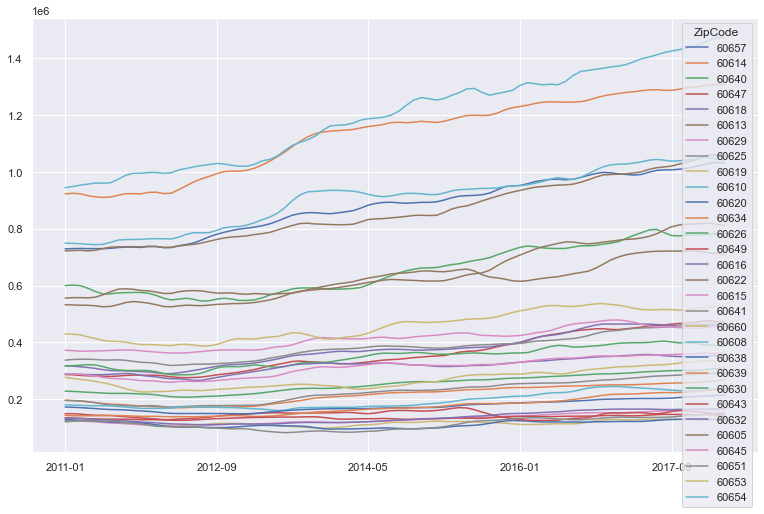

In [33]:
fun.plot(plot_df)
# plt.title('Home Values for Chicago Zip Codes from 2011-2018')
# plt.xlabel('time')
# plt.ylabel('median home value')
# plt.legend("")
# plt.show()

## This looks much better!
### The zip code that randomly started in 2013 is gone as well.

### I originally thought of modeling ROI instead of median value - but I am still unsure.
- Since the data is already preprocessed - I suppose I could make the ROI dataframe and test it against median values.
- I think the ROI will help with the issue of stationary data when modeling as well as good for forecasting and visualizations??

In [104]:
# save our filtered dataframe for future use and to prevent overriding
# NO INDEX with function ran !!
# fun.get_index_ready(plot_df)
plot_df.to_csv('chi_plot.csv', index=False)

In [35]:
# chi_plot.info()

In [255]:
# plot_df.head()

### I will make the ROI data set from the dataframe we saved above.

### But first I want to take the average of every year so as not to lose any valuable information.

In [154]:
plotting_df.head()

,ZipCode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,60640,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,60647,122700.0,122800.0,122800.0,122700.0,122400.0,122000.0,121500.0,120900.0,120500.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,60618,142600.0,143100.0,143400.0,143300.0,142900.0,142200.0,141300.0,140100.0,139000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [229]:
roi_df = plotting_df.copy()
roi_df.head()

,ZipCode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,60640,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,60647,122700.0,122800.0,122800.0,122700.0,122400.0,122000.0,121500.0,120900.0,120500.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,60618,142600.0,143100.0,143400.0,143300.0,142900.0,142200.0,141300.0,140100.0,139000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [230]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
%reload_ext autoreload

In [232]:
year_list = ['1996', '1997','1998', '1999','2000', '2001','2002',
             '2003','2004','2005','2006','2007','2008','2009',
             '2010','2011', '2012', '2013', '2014', '2015', 
             '2016', '2017', '2018']

In [233]:
for year in year_list:
    fun.get_mean_year(roi_df, year)

In [234]:
roi_df.head()

,ZipCode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,790743,760244,732548,761040,834854,881141,918897,975076,1001805,1028402
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1014667,964985,920240,965996,1078377,1163246,1196334,1246987,1286311,1304973
7,60640,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,...,654189,612099,582324,552544,576204,620609,687837,736271,776390,780645
16,60647,122700.0,122800.0,122800.0,122700.0,122400.0,122000.0,121500.0,120900.0,120500.0,...,326094,295397,283307,282759,321985,335174,369550,429273,457312,472169
19,60618,142600.0,143100.0,143400.0,143300.0,142900.0,142200.0,141300.0,140100.0,139000.0,...,349025,325650,305273,304986,346769,371575,381782,433078,461936,460633


#### Get rid of all the months since we now have the average value for each year

In [235]:
for col in roi_df:
    if '-' in col:
        roi_df.drop([col], inplace=True, axis=1)
roi_df.head()

,ZipCode,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,60657,345921,352942,396505,466646,565227,653381,711351,744140,783799,...,790743,760244,732548,761040,834854,881141,918897,975076,1001805,1028402
3,60614,512123,499496,561259,651321,750713,853123,931631,993753,1039340,...,1014667,964985,920240,965996,1078377,1163246,1196334,1246987,1286311,1304973
7,60640,223373,227483,260710,313352,379441,439705,488811,525081,559548,...,654189,612099,582324,552544,576204,620609,687837,736271,776390,780645
16,60647,125795,119906,133649,153535,184238,222121,246892,275076,305892,...,326094,295397,283307,282759,321985,335174,369550,429273,457312,472169
19,60618,145467,133178,150818,175660,213341,256170,274249,298255,340297,...,349025,325650,305273,304986,346769,371575,381782,433078,461936,460633


In [179]:
# roi_all_years = roi_df.copy()

In [180]:
# # flipping it for our plot function
# plot_roi = roi_df.transpose()
# ## Renaming columns
# new_header = plot_roi.iloc[0] ## grab first row for new header
# plot_roi = plot_roi[1:] ## take all data after first row
# plot_roi.columns = new_header ## reassign all columns to zipcodes

#### Below is 1996 to 2011 - I just wanted to confirm that the 2008 economic crash looked the same with the averages for the years and it does.

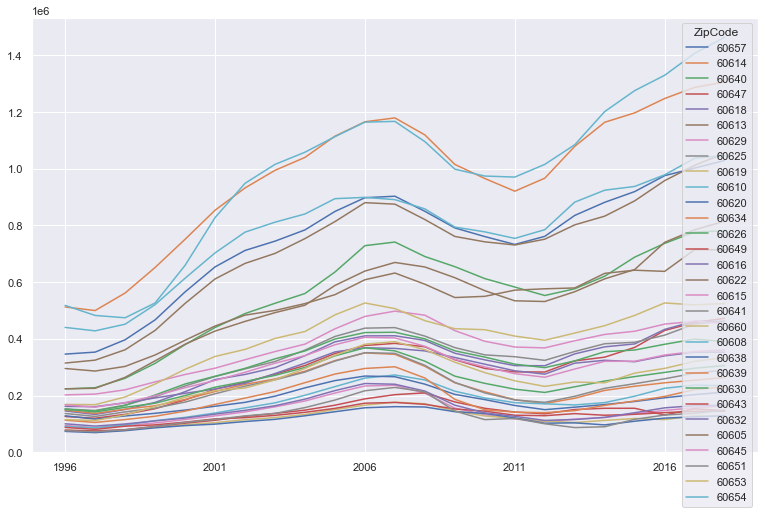

In [195]:
# average value for each year 
fun.plot(plot_roi)

In [185]:
# roi_all_years.to_csv('roi_avg_all_years.csv', index=False)

In [186]:
# roi_2011_years = roi_all_years.copy()
# # roi_2011_years just in case
# # eliminating all years before 2011 to account for 2008 crash
# for col in roi_2011_years.columns:
#     if col < '2011':
#         roi_2011_years.drop([col], inplace=True, axis=1)

# roi_2011_years.head()

,ZipCode,2011,2012,2013,2014,2015,2016,2017,2018
0,60657,732548,761040,834854,881141,918897,975076,1001805,1028402
3,60614,920240,965996,1078377,1163246,1196334,1246987,1286311,1304973
7,60640,582324,552544,576204,620609,687837,736271,776390,780645
16,60647,283307,282759,321985,335174,369550,429273,457312,472169
19,60618,305273,304986,346769,371575,381782,433078,461936,460633


In [187]:
# roi_2011_years.to_csv('roi_avg_2011.csv', index=False)

In [236]:
# eliminating all years before 2011 to account for 2008 crash
for col in roi_df.columns:
    if col < '2011':
        roi_df.drop([col], inplace=True, axis=1)

roi_df.head()

,ZipCode,2011,2012,2013,2014,2015,2016,2017,2018
0,60657,732548,761040,834854,881141,918897,975076,1001805,1028402
3,60614,920240,965996,1078377,1163246,1196334,1246987,1286311,1304973
7,60640,582324,552544,576204,620609,687837,736271,776390,780645
16,60647,283307,282759,321985,335174,369550,429273,457312,472169
19,60618,305273,304986,346769,371575,381782,433078,461936,460633


In [237]:
roi_df['2012-01'] = fun.get_return_rate('2011', '2012', roi_df)
roi_df['2013-01'] = fun.get_return_rate('2012', '2013', roi_df)
roi_df['2014-01'] = fun.get_return_rate('2013', '2014', roi_df) 
roi_df['2015-01'] = fun.get_return_rate('2014', '2015', roi_df)
roi_df['2016-01'] = fun.get_return_rate('2015', '2016', roi_df) 
roi_df['2017-01'] = fun.get_return_rate('2016', '2017', roi_df) 
roi_df['2018-01'] = fun.get_return_rate('2017', '2018', roi_df) 
roi_df.drop(['2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'], inplace=True, axis=1)
roi_df.head()

,ZipCode,2012-01,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01
0,60657,3.889438,9.699096,5.544323,4.284899,6.113743,2.741222,2.654908
3,60614,4.972181,11.633692,7.870068,2.844454,4.234018,3.153521,1.450816
7,60640,-5.113992,4.282012,7.706472,10.832585,7.041494,5.448945,0.548049
16,60647,-0.193430,13.872591,4.096154,10.256165,16.161007,6.531741,3.248767
19,60618,-0.094014,13.699973,7.153465,2.746956,13.435940,6.663465,-0.282074


In [264]:
# test_mean = roi_df.groupby('ZipCode')
# test_mean.head()

In [239]:
roi_df.index.nunique()

30

In [263]:
# # Chicago Zip Code % ROI from yearly average home values
# plt.figure(figsize = (13,8))
# plt.bar(mean_roi.index, roi_df['2018-01'], color='purple')
# plt.title('TOP Chicago Zip Codes by % ROI in 2018')
# plt.xlabel('Zip Code')
# plt.xticks(rotation=60)
# plt.ylabel('% ROI')
# plt.show()

In [248]:
# roi_df.to_csv('roi_from_averages.csv', index=False)

In [262]:
# mean_roi = roi_df.groupby('ZipCode').mean()
# mean_roi.head()

In [256]:
# no index with function!
# fun.get_index_ready(mean_roi)
# mean_roi.to_csv('mean_roi_from_averages.csv', index=False)

In [261]:
# # filter zipcodes % ROI over 3

# top_mean = mean_roi['2018-01'].quantile(q=0.50)
# print(f'2018 ROI 20% cutoff value: {top_mean}')
# top_mean_df = mean_roi[mean_roi['2018-01'] > top_mean]
# print(f'Amount of zip codes: {top_mean_df.index.nunique()}')
# top_mean_df.head()


In [50]:
date_roi = df_roi.groupby('ZipCode').mean()
date_roi.head()

,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01
ZipCode,,,,,,,
60605,3.850306,-1.351351,6.515630,7.419621,-5.587107,12.225654,4.143126
60608,-6.785317,-0.059666,2.328358,7.176196,14.589004,16.152019,-5.480573
60610,2.135611,6.246733,15.055351,-1.614283,3.433663,7.710894,2.487077
60613,2.160665,5.097614,5.030960,3.979366,10.441767,6.010695,6.063358
60614,0.639220,8.332436,13.862665,2.670623,4.615777,3.404567,2.365237


In [247]:
date_roi.head()

,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01
ZipCode,,,,,,,
60605,3.850306,-1.351351,6.515630,7.419621,-5.587107,12.225654,4.143126
60608,-6.785317,-0.059666,2.328358,7.176196,14.589004,16.152019,-5.480573
60610,2.135611,6.246733,15.055351,-1.614283,3.433663,7.710894,2.487077
60613,2.160665,5.097614,5.030960,3.979366,10.441767,6.010695,6.063358
60614,0.639220,8.332436,13.862665,2.670623,4.615777,3.404567,2.365237


In [51]:
date_roi.index.nunique()

30

In [52]:
zip_roi = date_roi.transpose()
zip_roi

ZipCode,60605,60608,60610,60613,60614,60615,60616,60618,60619,60620,...,60641,60643,60645,60647,60649,60651,60653,60654,60657,60660
2012-01-01,3.850306,-6.785317,2.135611,2.160665,0.639220,-1.798658,-3.564014,-7.687461,-10.883797,-14.263323,...,-9.584828,-5.423477,-8.858131,-0.837696,-12.365591,-12.905912,-18.099711,5.672558,1.151789,-8.932310
2013-01-01,-1.351351,-0.059666,6.246733,5.097614,8.332436,1.995626,5.238608,10.750853,4.132231,-3.930530,...,1.077098,5.970149,4.024298,5.491024,12.883436,-8.699809,6.528452,2.203305,8.756947,5.287356
2014-01-01,6.515630,2.328358,15.055351,5.030960,13.862665,10.881801,11.012615,13.528505,-11.287478,-9.609895,...,21.424565,-3.780578,13.832117,8.375042,3.464674,-11.623037,1.532091,14.130328,6.718185,0.460941
2015-01-01,7.419621,7.176196,-1.614283,3.979366,2.670623,2.344694,-2.395577,1.275787,20.874751,2.631579,...,6.882217,0.924499,2.404617,7.881773,3.939593,16.587678,5.954323,8.027818,4.298061,13.523304
2016-01-01,-5.587107,14.589004,3.433663,10.441767,4.615777,0.212565,3.807426,7.343876,-8.717105,26.974359,...,10.025929,6.030534,3.443957,13.727169,-19.330385,34.349593,10.854503,3.703704,6.662934,8.721549
2017-01-01,12.225654,16.152019,7.710894,6.010695,3.404567,12.773981,6.183692,15.955056,15.405405,-2.504039,...,5.380990,2.663787,6.295400,11.769134,18.872357,2.269289,8.125000,5.004598,4.671916,4.343573
2018-01-01,4.143126,-5.480573,2.487077,6.063358,2.365237,-5.935214,-0.057094,-1.507321,-0.780640,5.799503,...,7.454342,1.753156,2.676538,6.533453,1.515152,7.396450,7.514451,6.043354,2.748245,-2.212638


In [53]:
# fun.plot(zip_roi)

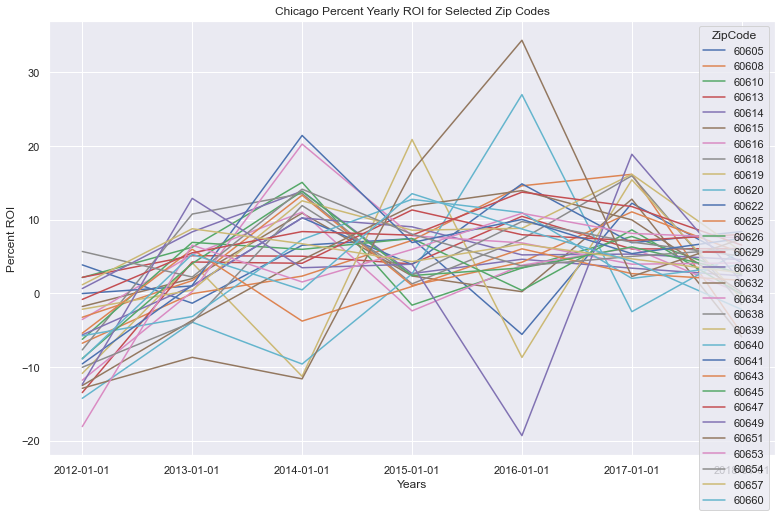

In [54]:
zip_roi.plot(figsize=(13, 8))
plt.xlabel('Years')
plt.ylabel('Percent ROI')
plt.title('Chicago Percent Yearly ROI for Selected Zip Codes')
plt.show()

### Let's filter out only the zip codes with an ROI percentage over 3% in 2018
#### We will do this for both the roi df and the values df

In [99]:
# filter zipcodes with a size rank in the top 75% (highly urbanized zipcodes)

top_percent = date_roi['2018-01-01'].quantile(q=0.50)
print(f'2018 ROI 20% cutoff value: {top_percent}')
top_percent_df = date_roi[date_roi['2018-01-01'] > top_percent]
print(f'Amount of zip codes: {top_percent_df.index.nunique()}')
top_percent_df.head()


2018 ROI 20% cutoff value: 3.9929763994008263
Amount of zip codes: 15


,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01
ZipCode,,,,,,,
60605,3.850306,-1.351351,6.515630,7.419621,-5.587107,12.225654,4.143126
60613,2.160665,5.097614,5.030960,3.979366,10.441767,6.010695,6.063358
60620,-14.263323,-3.930530,-9.609895,2.631579,26.974359,-2.504039,5.799503
60622,-0.037545,0.995305,10.245444,3.896104,14.853896,6.855124,8.373016
60625,-3.259259,1.715161,13.309244,1.062982,4.207205,11.052233,5.453306


In [106]:
top_percent_df

,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01
ZipCode,,,,,,,
60605,3.850306,-1.351351,6.515630,7.419621,-5.587107,12.225654,4.143126
60613,2.160665,5.097614,5.030960,3.979366,10.441767,6.010695,6.063358
60620,-14.263323,-3.930530,-9.609895,2.631579,26.974359,-2.504039,5.799503
60622,-0.037545,0.995305,10.245444,3.896104,14.853896,6.855124,8.373016
60625,-3.259259,1.715161,13.309244,1.062982,4.207205,11.052233,5.453306
60629,-13.487630,4.243542,4.070796,11.309524,7.944996,7.147912,7.992074
60630,-5.655414,0.975836,10.216291,9.018789,5.208732,5.314889,4.562738
60634,-11.800610,0.230681,20.253165,7.799043,6.835331,3.946822,4.116707
60638,-10.052295,-3.940568,11.903161,2.463942,9.736070,6.948156,5.047476


In [100]:
# again we need THESE NEED AN INDEX - also they can be used for bar plots
top_percent_df.to_csv('top_roi_for_melting.csv')
date_roi.to_csv('chi_roi_for_melting.csv')

In [78]:
top_roi = top_percent_df.transpose()
top_roi.head()

ZipCode,60605,60613,60620,60622,60625,60629,60630,60634,60638,60639,60641,60647,60651,60653,60654
2012-01-01,3.850306,2.160665,-14.263323,-0.037545,-3.259259,-13.487630,-5.655414,-11.800610,-10.052295,-2.172390,-9.584828,-0.837696,-12.905912,-18.099711,5.672558
2013-01-01,-1.351351,5.097614,-3.930530,0.995305,1.715161,4.243542,0.975836,0.230681,-3.940568,0.429799,1.077098,5.491024,-8.699809,6.528452,2.203305
2014-01-01,6.515630,5.030960,-9.609895,10.245444,13.309244,4.070796,10.216291,20.253165,11.903161,12.553495,21.424565,8.375042,-11.623037,1.532091,14.130328
2015-01-01,7.419621,3.979366,2.631579,3.896104,1.062982,11.309524,9.018789,7.799043,2.463942,8.555133,6.882217,7.881773,16.587678,5.954323,8.027818
2016-01-01,-5.587107,10.441767,26.974359,14.853896,4.207205,7.944996,5.208732,6.835331,9.736070,8.814945,10.025929,13.727169,34.349593,10.854503,3.703704


In [96]:
# zip_roi.rename(columns={'Unnamed: 0': 'time'}, inplace=True)

In [98]:
# re-save our filtered dataframes for future use and to prevent overriding
# NO INDEX with function ran !!
# fun.get_index_ready(zip_roi)
# fun.get_index_ready(top_roi)
zip_roi.to_csv('roi_df_plotting.csv', index=False)
top_roi.to_csv('top_percent_roi_plotting.csv', index=False)

In [63]:
date_roi.head()

,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01
ZipCode,,,,,,,
60605,3.850306,-1.351351,6.515630,7.419621,-5.587107,12.225654,4.143126
60608,-6.785317,-0.059666,2.328358,7.176196,14.589004,16.152019,-5.480573
60610,2.135611,6.246733,15.055351,-1.614283,3.433663,7.710894,2.487077
60613,2.160665,5.097614,5.030960,3.979366,10.441767,6.010695,6.063358
60614,0.639220,8.332436,13.862665,2.670623,4.615777,3.404567,2.365237


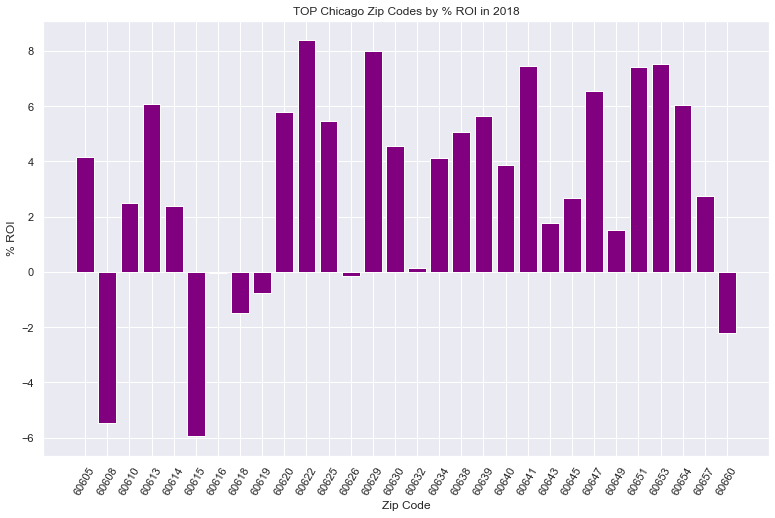

In [243]:

# TOP Chicago Zip Codes by % ROI in 2018

plt.figure(figsize = (13,8))
plt.bar(date_roi.index, date_roi['2018-01-01'], color='purple')
plt.title('TOP Chicago Zip Codes by % ROI in 2018')
plt.xlabel('Zip Code')
plt.xticks(rotation=60)
plt.ylabel('% ROI')
plt.show()

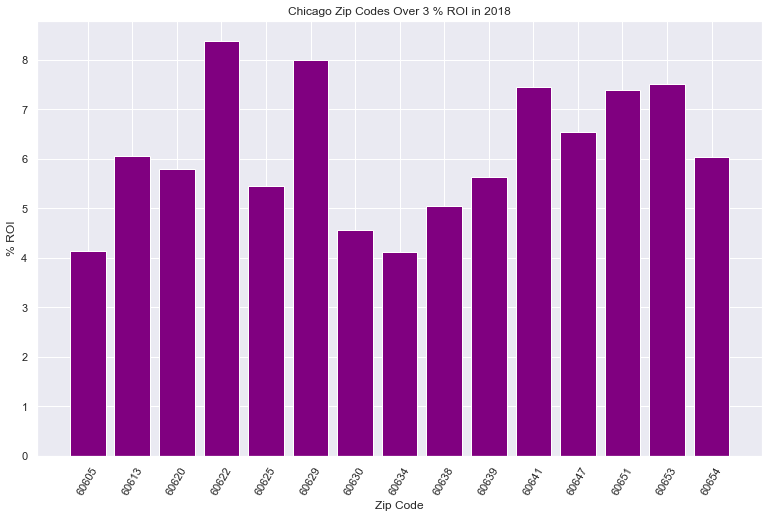

In [244]:

# Chicago Zip Codes Over 3 % ROI in 2018

plt.figure(figsize = (13,8))
plt.bar(top_percent_df.index, top_percent_df['2018-01-01'], color='purple')
plt.title('Chicago Zip Codes Over 3 % ROI in 2018')
plt.xlabel('Zip Code')
plt.xticks(rotation=60)
plt.ylabel('% ROI')
plt.show()

In [248]:
top_percent_df.index.unique()
top_percent_df.index.nunique()
top_roi.columns.nunique()

15

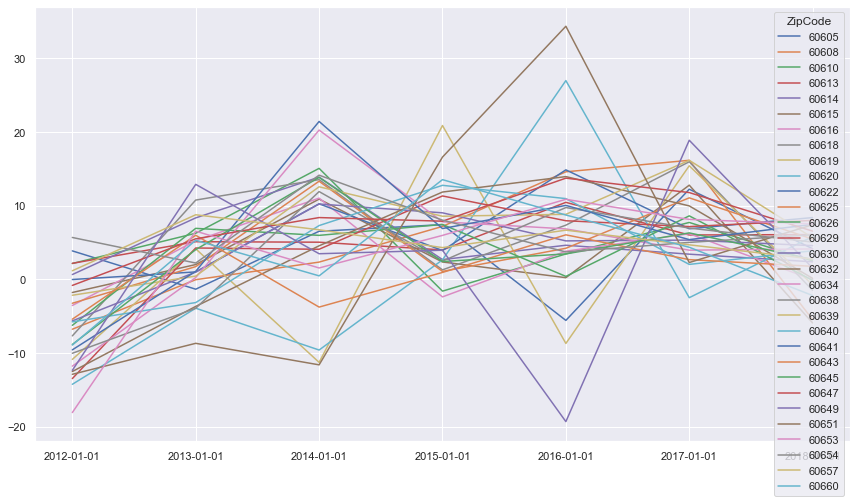

In [241]:
fun.plot(zip_roi)

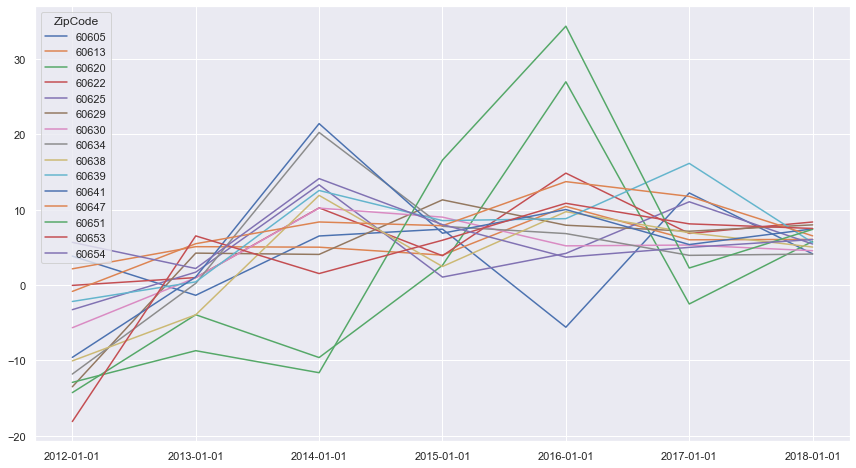

In [250]:
fun.plot(top_roi)

In [258]:
import cufflinks as cf
cf.go_offline()
roi_chi.iplot(title="ROI of Chicago Homes 2011-2018",
                    xTitle="Year",
                    yTitle="Percent ROI",
                   shape=(13,8),
                    subplot_titles=True,
                    fill=True,)

In [259]:
# import cufflinks as cf
# cf.go_offline()
chi_filtered.iplot(title="Value of Chicago Homes 2011-2018",
                    xTitle="Year",
                    yTitle="Home Values",
                   shape=(13,8),
                    subplot_titles=True,
                    fill=True,)

### Here is where I wanted to map out the ROI for all states

In [191]:
z_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [234]:
map_df = pd.DataFrame()
map_df['State'] = z_df['State']
map_df['2018-04'] = z_df['2018-04']
map_df['2017-04'] = z_df['2017-04']
map_df.head()

,State,2018-04,2017-04
0,IL,1030600,989200
1,TX,321800,304400
2,TX,329900,320000
3,IL,1307000,1282500
4,TX,121500,118000


In [235]:
map_df['2018-04-01'] = fun.get_return_rate('2017-04', '2018-04', map_df)

In [236]:
map_df.head()

,State,2018-04,2017-04,2018-04-01
0,IL,1030600,989200,0.041852
1,TX,321800,304400,0.057162
2,TX,329900,320000,0.030937
3,IL,1307000,1282500,0.019103
4,TX,121500,118000,0.029661


In [237]:
map_df = map_df.groupby('State').mean()*100

In [238]:
map_df.reset_index(inplace=True)

In [239]:
map_df.head()

,State,2018-04,2017-04,2018-04-01
0,AK,3.230464e+07,3.160893e+07,2.216190
1,AL,1.570339e+07,1.477973e+07,6.503329
2,AR,1.376200e+07,1.298657e+07,6.529845
3,AZ,2.719522e+07,2.529217e+07,8.283342
4,CA,7.463291e+07,6.776819e+07,9.793955


In [243]:
fig = px.choropleth(map_df, locations='State', locationmode='USA-states',
                    color='2018-04-01', scope='usa', color_continuous_scale='Purples', 
            title='Percent Yearly Average ROI by State')
fig.show()

In [249]:
map_df.to_csv('map_df.csv', index=False)

In [25]:
michigan = z_df.loc[z_df['State']=='MI']
michigan.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
87,79054,48197,Ypsilanti,MI,Ann Arbor,Washtenaw,88,129200.0,129800.0,130400.0,...,200200,201700,202800,203500,204300,205000,205700,207400,210300,212300
121,79040,48180,Taylor,MI,Detroit,Wayne,122,69000.0,69500.0,69800.0,...,87700,88500,88900,89200,90300,91700,93000,94000,95100,96200
220,78975,48103,Ann Arbor,MI,Ann Arbor,Washtenaw,221,150100.0,150800.0,151400.0,...,339900,342800,345600,347800,350300,352900,355700,360200,365900,369800
238,79044,48185,Westland,MI,Detroit,Wayne,239,94800.0,95500.0,96300.0,...,132900,135000,136600,137400,138200,139200,140100,140900,141700,142400
313,79398,48823,East Lansing,MI,Lansing,Ingham,314,74800.0,74700.0,74700.0,...,189200,189700,190300,191900,194900,196200,195200,194300,194400,194900


In [30]:
# filter zipcodes with a size rank in the top 1% (highly urbanized zipcodes)

urban = michigan.SizeRank.quantile(q=0.01)
print(f'Size Rank 01% cutoff value: {urban}')
mi = michigan[michigan['SizeRank'] < urban]
print(f'Amount of zipcodes: {len(mi)}')
mi.head()

Size Rank 01% cutoff value: 506.0800000000001
Amount of zipcodes: 5


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
87,79054,48197,Ypsilanti,MI,Ann Arbor,Washtenaw,88,129200.0,129800.0,130400.0,...,200200,201700,202800,203500,204300,205000,205700,207400,210300,212300
121,79040,48180,Taylor,MI,Detroit,Wayne,122,69000.0,69500.0,69800.0,...,87700,88500,88900,89200,90300,91700,93000,94000,95100,96200
220,78975,48103,Ann Arbor,MI,Ann Arbor,Washtenaw,221,150100.0,150800.0,151400.0,...,339900,342800,345600,347800,350300,352900,355700,360200,365900,369800
238,79044,48185,Westland,MI,Detroit,Wayne,239,94800.0,95500.0,96300.0,...,132900,135000,136600,137400,138200,139200,140100,140900,141700,142400
313,79398,48823,East Lansing,MI,Lansing,Ingham,314,74800.0,74700.0,74700.0,...,189200,189700,190300,191900,194900,196200,195200,194300,194400,194900


In [31]:
mich_df = pd.DataFrame()
mich_df['SizeRank'] = mi['SizeRank']
mich_df['ZipCodes'] = mi['RegionName']
mich_df

,SizeRank,ZipCodes
87,88,48197
121,122,48180
220,221,48103
238,239,48185
313,314,48823


In [37]:
cate_df = pd.DataFrame()
cate_df['SizeRank'] = chicago['SizeRank']

In [38]:
cate_df['ZipCodes'] = chicago['RegionName']

In [40]:
cate_df.index

Int64Index([0, 3, 7, 16, 19, 40, 48, 50], dtype='int64')

In [41]:
cate_df['Risk'] = ['Moderate', 'Low', 'High', 'Moderate', 'Low', 'Low', 'High', 'Low']

In [33]:
cate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 50
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SizeRank  8 non-null      int64
 1   ZipCodes  8 non-null      int64
dtypes: int64(2)
memory usage: 192.0 bytes


In [45]:
cate_df.head()

,SizeRank,ZipCodes,Risk,TrainLines
0,1,60657,Moderate,Red
3,4,60614,Low,Blue
7,8,60640,High,Brown
16,17,60647,Moderate,Pink
19,20,60618,Low,Red


In [44]:
cate_df['TrainLines'] = ['Red', 'Blue', 'Brown', 'Pink', 'Red', 'Blue', 'Red', 'Brown']

In [47]:
cate_df['Neighborhood'] = ['Lincoln Square', 'Uptown', 'Uptown', 'Boystown', 'Uptown', 
                           'Chicago Lawn', 'Logan Square', 'Boystown']

In [48]:
import plotly.graph_objects as go

df = cate_df
fig = px.parallel_categories(df)

# df = px.data.tips()
# fig = px.parallel_categories(df, dimensions=['sex', 'smoker', 'day'],
#                 color="size", color_continuous_scale=px.colors.sequential.Inferno,
#                 labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'})

fig.show()